In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv("ShelterDogs.csv", parse_dates=['date_found','adoptable_from','posted'])
df.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Upon obseving the columns it is found that ID, name are not relevent to the analysis

In [243]:
df.columns[df.isna().mean()>0.5]

Index(['housebroken', 'likes_children', 'get_along_cats'], dtype='object')

In [244]:
#Since these columns have more than 50% of data missing, we drop them along with ID, name
df_new = df.drop(['housebroken', 'likes_children', 'get_along_cats','ID','name'],axis=1)

In [245]:
df_new.columns[df_new.isna().mean()>0.25]

Index(['neutered', 'likes_people', 'get_along_males', 'get_along_females',
       'keep_in'],
      dtype='object')

In [246]:
print(df_new.shape)
df_new = df_new.dropna(axis=0) #dropping rows with nan values, as they dont help in the analysis
df_new.shape

(2937, 14)


(881, 14)

In [247]:
df_new.head()

,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,likes_people,get_along_males,get_along_females,keep_in
9,0.17,female,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,brown and white,short,small,no,yes,yes,yes,flat
13,0.17,male,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,tricolor,short,small,no,yes,yes,yes,flat
16,0.17,female,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,tricolor,short,small,no,yes,yes,yes,flat
17,0.83,male,Unknown Mix,2019-12-05,2019-12-05,2019-12-09,black,wirehaired,small,yes,yes,yes,yes,both flat and garden
29,2.42,male,Hungarian Vizsla,2019-12-07,2019-12-07,2019-12-07,brown,short,medium,no,yes,yes,yes,both flat and garden


In [248]:
df_new.dtypes

age                         float64
sex                          object
breed                        object
date_found           datetime64[ns]
adoptable_from       datetime64[ns]
posted               datetime64[ns]
color                        object
coat                         object
size                         object
neutered                     object
likes_people                 object
get_along_males              object
get_along_females            object
keep_in                      object
dtype: object

In [249]:
for col in df_new.columns:
    if(df_new[col].dtype==object):
        print(col, df_new[col].unique())

sex ['female' 'male']
breed ['Unknown Mix' 'Hungarian Vizsla' 'Fox Terrier Mix'
 'Hungarian Vizsla, Staffordshire Terrier Mix' 'Terrier Mix'
 'Staffordshire Terrier Mix'
 'German Shepherd Dog, Staffordshire Terrier Mix' 'Dachshund Mix'
 'Dachshund, Fox Terrier Mix' 'Beagle, Hound Mix'
 'Dachshund, German Shepherd Dog Mix' 'Norfolk Terrier Mix'
 'Greyhound Mix' 'Bull Terrier Mix' 'Puli Mix' 'German Shepherd Dog Mix'
 'Border Collie Mix' 'Labrador Retriever Mix' 'English Greyhound Mix'
 'Golden Retriever Mix' 'Poodle Mix' 'German Pointer' 'Pinscher Mix'
 'Chihuahua Mix' 'Labrador Retriever, Poodle Mix' 'Komondor'
 'Chinese Shar-Pei' 'Pekingese, Tibetan Spaniel Mix' 'Rottweiler Mix'
 'Scotch Collie' 'Siberian Husky Mix'
 'Bearded Collie, Labrador Retriever Mix'
 'Greyhound, Hungarian Greyhound Mix'
 'Australian Shepherd, Labrador Retriever Mix' 'Yorkshire Terrier'
 'Belgian Malinois, German Shepherd Dog Mix' 'Dachshund'
 'German Shepherd Dog, Greyhound Mix' 'Akita'
 'German Shepherd Dog, 

* On observing the values:
    * neutered, likes_people, get_along_males, get_along_females can be converted to boolean values
    * coat, size,color,sex, keep_in are categories
    * breed, name are mostly unique
   
Convert the yes/no to boolean values for easier processing

In [250]:
df_new = df_new.replace({'no': 0, 'yes':1})
df_new['neutered'] = df_new['neutered'].astype('bool')
df_new['likes_people'] = df_new['likes_people'].astype('bool')
df_new['get_along_males'] = df_new['get_along_males'].astype('bool')
df_new['get_along_females'] = df_new['get_along_females'].astype('bool')

df_new.head()

,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,likes_people,get_along_males,get_along_females,keep_in
9,0.17,female,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,brown and white,short,small,False,True,True,True,flat
13,0.17,male,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,tricolor,short,small,False,True,True,True,flat
16,0.17,female,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,tricolor,short,small,False,True,True,True,flat
17,0.83,male,Unknown Mix,2019-12-05,2019-12-05,2019-12-09,black,wirehaired,small,True,True,True,True,both flat and garden
29,2.42,male,Hungarian Vizsla,2019-12-07,2019-12-07,2019-12-07,brown,short,medium,False,True,True,True,both flat and garden


In [251]:
df_new_cor = pd.get_dummies(df_new,prefix= ['coat','size','keep_in','sex'], columns=['coat','size','keep_in','sex'])
df_new_cor.head()

,age,breed,date_found,adoptable_from,posted,color,neutered,likes_people,get_along_males,get_along_females,...,coat_short,coat_wirehaired,size_large,size_medium,size_small,keep_in_both flat and garden,keep_in_flat,keep_in_garden,sex_female,sex_male
9,0.17,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,brown and white,False,True,True,True,...,1,0,0,0,1,0,1,0,1,0
13,0.17,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,tricolor,False,True,True,True,...,1,0,0,0,1,0,1,0,0,1
16,0.17,Unknown Mix,2019-12-10,2019-12-10,2019-12-11,tricolor,False,True,True,True,...,1,0,0,0,1,0,1,0,1,0
17,0.83,Unknown Mix,2019-12-05,2019-12-05,2019-12-09,black,True,True,True,True,...,0,1,0,0,1,1,0,0,0,1
29,2.42,Hungarian Vizsla,2019-12-07,2019-12-07,2019-12-07,brown,False,True,True,True,...,1,0,0,1,0,1,0,0,0,1


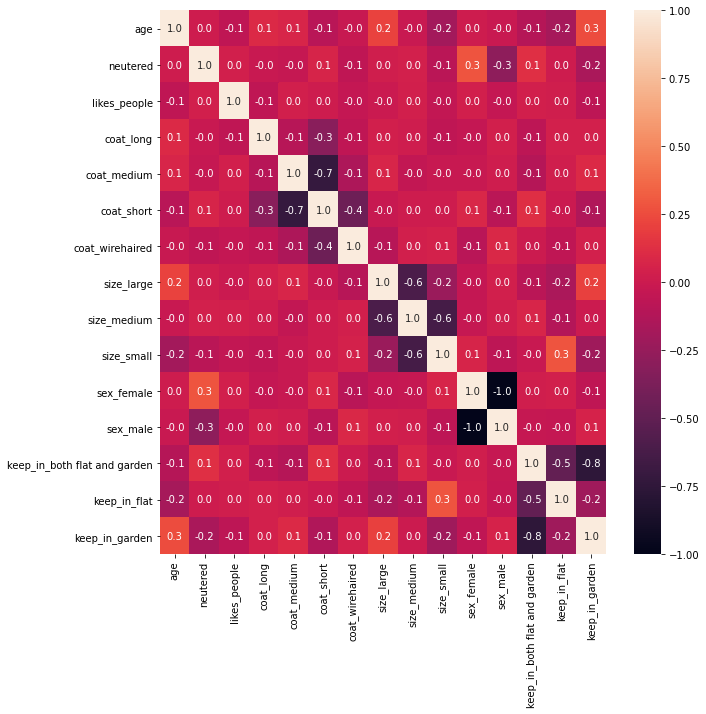

In [252]:
corrMatrix = df_new_cor[['age',
       'neutered', 'likes_people',
       'coat_long', 'coat_medium', 'coat_short', 'coat_wirehaired',
       'size_large', 'size_medium', 'size_small', 
       'sex_female', 'sex_male',
       'keep_in_both flat and garden', 'keep_in_flat', 'keep_in_garden']].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True, ax=ax, fmt='.1f')
plt.show()

* short coat and medium coat seems to be negatively correlated, similar pattern observed in medium and large size dogs
* keep in garden and keep in both flat and garden seems to have a strong negative correlation

### Lets see the distribution of color in shelter dogs

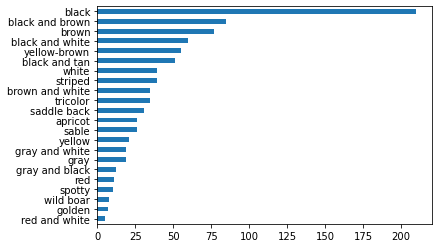

In [253]:
df_new['color'].value_counts().sort_values().plot(kind = 'barh')

* Upon observing the plot, its clear that majority of dogs in this shelter are black in color, followed by shades of black and brown.
* Lets find out if this is because black dogs are more common, or if there is some underlying reason.
  A quick google search indicates that the most common colors are black, brown and white, while red are rare. So this distribution is normal.

### Question 1: Do neutered dogs get along with people more?

In [254]:
print(df_new[['likes_people']].value_counts().sort_values())

orange = sns.light_palette("orange", as_cmap=True)
pd.crosstab(index=[df_new['likes_people']], columns=[df_new['sex'], df_new['neutered']]).style.background_gradient(cmap=orange)

likes_people
False             5
True            876
dtype: int64


* The dataset is highly skewed with only 5 dogs out of 881 that dont like people.
* This shows that shelter dogs generally like people irrespective of being neutered or not

### Question 2: Do female dogs like and get along with people more than male dogs?

In [255]:
def label_get_along (row):
    if row['get_along_females']== 1 and row['get_along_males']  == 1 :
        return 'both'
    if row['get_along_females']== 0 and row['get_along_males']  == 1 :
        return 'only males' 
    if row['get_along_females']== 1 and row['get_along_males']  == 0:
        return 'only females' 
    if row['get_along_females']== 0 and row['get_along_males']  == 0:
        return 'none'
    
df_new['get_along_people'] = df_new.apply (lambda row: label_get_along(row), axis=1)

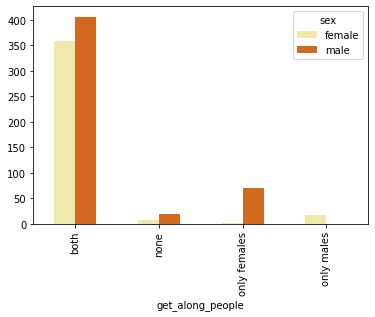

In [256]:
pd.crosstab(df_new['get_along_people'],df_new['sex']).plot.bar(color=('palegoldenrod','chocolate'))


* From the plot its clear that majority of the dogs in the shelter get along well with humans,
* There seems to be few male dogs, that prefer human females. This effect is less prominent vice versa (femal dogs prefering male humans).
   This difference can also be due to the fact that there are around 100 more male dogs than female dogs in the shelter.

In [257]:
df_new['sex'].value_counts()

male      496
female    385
Name: sex, dtype: int64

### Question 3: Does coat of dog affect if its kept in or out
 No one wants dog hair all over the house :)

In [258]:
orange = sns.light_palette("orange", as_cmap=True)
pd.crosstab(index=[df_new['keep_in']], columns=[df_new['size'], df_new['coat']]).style.background_gradient(cmap=orange)

* From the table its clear that majority of the shelter dogs can be kept in both flats or garden.
* Its interesting to note that the size of dog is a more important factor in deciding where to keep it, rather than the coat length
* That is fur shedding, which is more common in dogs with longer coats, does not seem to be a reason to keep dogs out

### Question 4: Does the dog spend a lot of time in the shelter, before being ready for adoption
Duration between date_found and date_posted

In [261]:
df_new['date_diff'] = df_new['posted'] -df_new['date_found']
df_new['date_diff']

9         1 days
13        1 days
16        1 days
17        4 days
29        0 days
          ...   
2917   1574 days
2919    843 days
2925    181 days
2932    818 days
2936     89 days
Name: date_diff, Length: 881, dtype: timedelta64[ns]

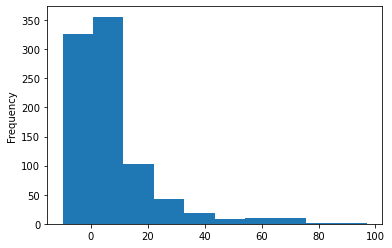

In [262]:
df_new['date_diff'].astype('timedelta64[M]').plot.hist()

Most dogs are ready to be adopted within a year of comming to the shelter.

In [263]:
df_new['Months in shelter'] = df_new['date_diff'].astype('timedelta64[M]')

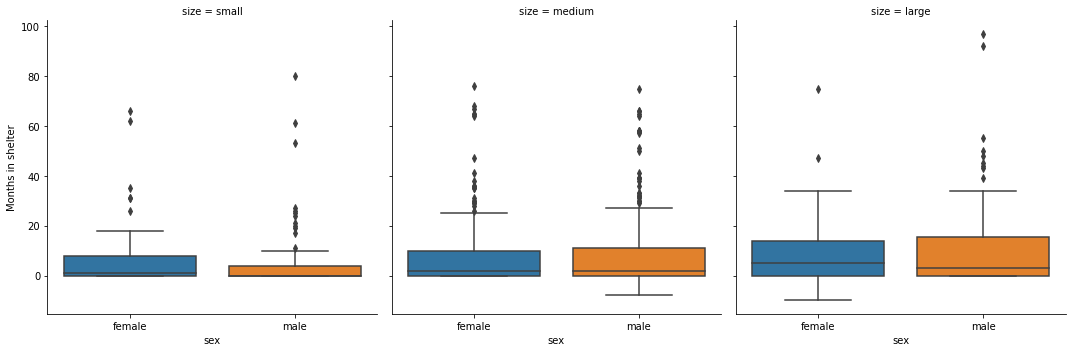

In [264]:
sns.catplot(kind="box",data=df_new, x='sex',y='Months in shelter', col='size')
plt.show()

* Overall the size or sex of the dog doesent affect the speed at which its posted as ready to be adopted.
* Large dogs seem to take slightly more time than others to become ready for adoption
* There seem to be more outliers in medium sized dogs, where they take more time to be ready for adoption